# One Compartment Pharmacokinetics Model

Pharmacokinetics is a branch of pharmacology that studies the fate of chemical species in living organisms. The diverse range of applications includes drug administration and anesthesia, and more generally the fate pesticides, food additives, and cosmetics in organisms. 

## Model Description

The simplest example of a pharmacokinetic model has the same form as a model for the dilution of a chemical species in a constant volume stirred-tank mixer.  For a constant volume stirred-tank reactor with volume $V$, volumetric outlet flowrate $Q$, and inlet mass flow $u(t)$ for a species of interest,

$$V \frac{dC}{dt} = u(t) - Q C(t)$$

where $C$ is concentration in units of mass per unit volume. 

## Problem Description

For this example we will consider the administration of an antibiotic to a patient. The concentration $C$ corresponds to the concentration of the blood of the antibiotic in the blood plasma measured in [mg/liter]. The plasma volume $V$ is 4 liters, the clearance rate $Q$ is 0.5 liters/hour. The antibiotic is administered intravenously at a dose of 64 mg resulting in an initial plasma concentration $C_{initial}$ of 64mg/4 liters = 16 mg/liter.

The minimum inhibitory concentration (MIC) is 5 mg/liter, the minimum bactricidal concentration (MBC) is 8 mg/liter. The problem is to design an antibiotic therapy to keep the plasma concentration above the MIC level for a period of 96 hours.

## Initialization

Generally the first steps in any Jupyter notebook are to 

1. initialize the plotting system to display graphics inside the notebook, and
2. import the `numpy` library that provides basic mathematical functions, and
3. import the `matplotlib.pyplot` library for plotting capabilities similar to Matlab.

In addition, for this particular application we also import `odeint` function for solving differential equations from the `scipy.integrate` library.

In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Simulation from a Known Initial Condition

For this first simulation we compute the response of the one compartment model due to an initial condition $C_{initial}$, assuming input $u(t) = 0$.  

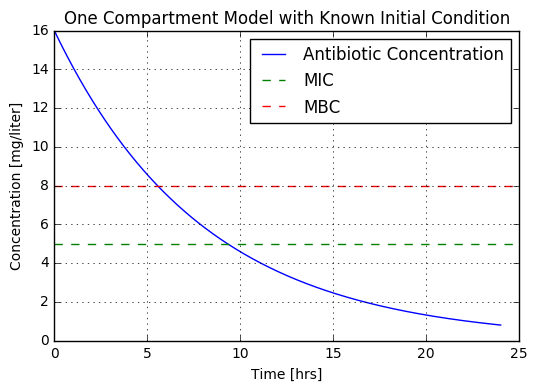

In [60]:
# parameter values
V = 4          # liters
Q = 0.5        # liters/hour
Cinitial = 16  # mg/liter
MIC = 5        # mg/liter
MBC = 8        # mg/liter

# differential equation
def u(t):
    return 0

def Cderiv(C,t):
    return u(t)/V - (Q/V)*C

# simulation
t = np.linspace(0,24,1000)
sol = odeint(Cderiv, Cinitial, t)

# visualization
plt.plot(t,sol)
plt.plot(plt.xlim(),[MIC,MIC],'g--')
plt.plot(plt.xlim(),[MBC,MBC],'r--')
plt.legend(['Antibiotic Concentration','MIC','MBC'])
plt.xlabel('Time [hrs]')
plt.ylabel('Concentration [mg/liter]')
plt.title('One Compartment Model with Known Initial Condition')
plt.grid()

## Dosing Function

For the next simulation we will assume the dosing takes place over a short period of time $\delta t$. To obtain a total dose $U_{dose}$ in a time period $\delta t$, the mass flow rate rate must be

$$u(t) = 
\begin{cases}
U/ \delta t \qquad \mbox{for } 0 \leq t \leq \delta t \\
0 \qquad \mbox{for } t \geq \delta t
\end{cases}
$$

Before doing a simulation, we will write a Python function for $u(t)$. This code cell demonstrates the use of a unique Python feature - list comprehension - to apply a function to each value in a list.

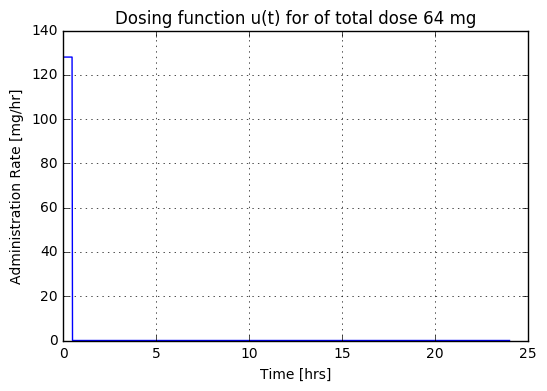

In [58]:
# parameter values
dt = 0.5         # length hours
Udose = 64       # mg

# function defintion
def u(t):
    if t <= dt:
        return Udose/dt
    else:
        return 0

# simulation
t = np.linspace(0,24,1000)    # create a list of time steps
y = [u(tau) for tau in t]         # list comprehension

# visualization
plt.plot(t,y)
plt.xlabel('Time [hrs]')
plt.ylabel('Administration Rate [mg/hr]')
plt.title('Dosing function u(t) for of total dose {0} mg'.format(Udose))
plt.grid()

The next cell is a the complete Python code (except for the initializations) to perform a simulation of one compartment model subject to a single dose of antibiotic.

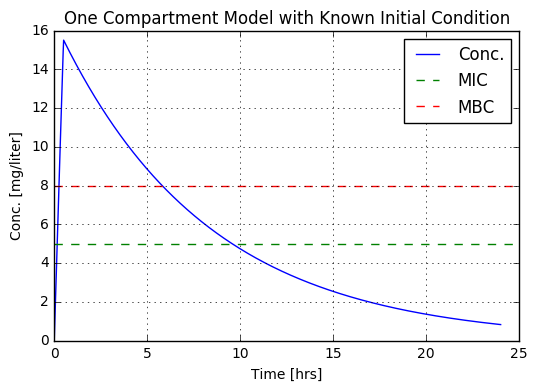

In [49]:
# parameter values
V = 4          # liters
Q = 0.5        # liters/hour
Cinitial = 0   # mg/liter
MIC = 5        # mg/liter
MBC = 8        # mg/liter

# parameter values
dt = 0.5      # hours
Udose = 64       # mg

# function defintion
def u(t):
    if t <= dt:
        return Udose/dt
    else:
        return 0

# differential equation
def Cderiv(C,t):
    return u(t)/V - (Q/V)*C

# simulation
t = np.linspace(0,24,1000)
sol = odeint(Cderiv, Cinitial, t)

# visualization
plt.plot(t,sol)
plt.plot(plt.xlim(),[MIC,MIC],'g--')
plt.plot(plt.xlim(),[MBC,MBC],'r--')
plt.legend(['Conc.','MIC','MBC'])
plt.xlabel('Time [hrs]')
plt.ylabel('Conc. [mg/liter]')
plt.title('One Compartment Model with Known Initial Condition')
plt.grid()

# Repetitive Dosing

Finally, we'll consider the case of repetitive dosing where a new dose is administered every $t_{dose}$ hours. The trick to this calculation is the Python `%` operator which returns the remainder following division. This is a very useful tool for creating complex repetitive functions.

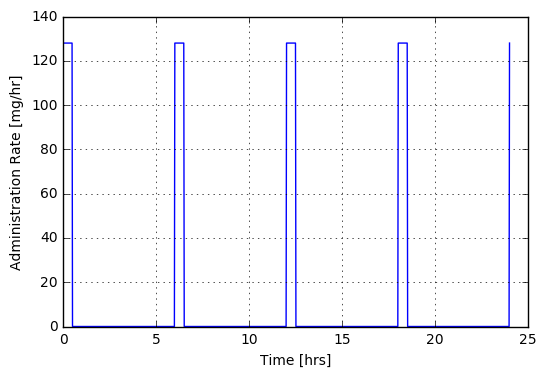

In [62]:
# parameter values
td = 0.5         # length of administration for a single dose
tdose = 6        # time between doses
Udose = 64       # mg

# function defintion
def u(t):
    if t % tdose <= dt:
        return Udose/td
    else:
        return 0

# simulation
t = np.linspace(0,24,1000)    # create a list of time steps
y = [u(t) for t in t]         # list comprehension

# visualization
plt.plot(t,y)
plt.xlabel('Time [hrs]')
plt.ylabel('Administration Rate [mg/hr]')
plt.grid()

The dosing function $u(t)$ is now applied to the simulation of drug concentration in the blood plasma. A fourth argument is added to `odeint(Cderiv, Cinitial, t, tcrit=t)` indicating that special care must be used for every time step. This is needed in order to get a high fidelity simulation that accounts for the rapidly varying values of $u(t)$.

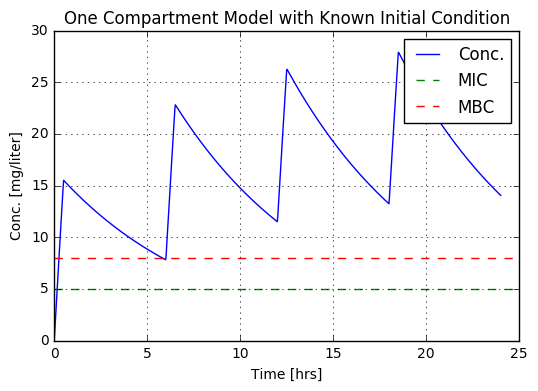

In [51]:
# parameter values
V = 4          # liters
Q = 0.5        # liters/hour
Cinitial = 0   # mg/liter
MIC = 5        # mg/liter
MBC = 8        # mg/liter

# parameter values
td = 0.5         # length hours
tdose = 6        # dosing period
Udose = 64       # mg

# function defintion
def u(t):
    if t % tdose <= dt:
        return Udose/td
    else:
        return 0

# differential equation
def Cderiv(C,t):
    return u(t)/V - (Q/V)*C

# simulation
t = np.linspace(0,24,1000)
sol = odeint(Cderiv, Cinitial, t, tcrit=t)

# visualization
plt.plot(t,sol)
plt.plot(plt.xlim(),[MIC,MIC],'g--')
plt.plot(plt.xlim(),[MBC,MBC],'r--')
plt.legend(['Conc.','MIC','MBC'])
plt.xlabel('Time [hrs]')
plt.ylabel('Conc. [mg/liter]')
plt.title('One Compartment Model with Known Initial Condition')
plt.grid()

# Exercise 1

The purpose of the dosing regime is to maintain the plasma concentration above the MIC level for at least 96 hours. Assuming that each dose is 64 mg, modify the simulation and find a value of $t_{dose}$ that results satisfies the MIC objective for a 96 hour period.  Show a plot concentration versus time, and include Python code to compute the total amount of antibiotic administered for the whole treatment.

# Exercise 2

Consider a continous antibiotic injection at a constant rate designed to maintain the plasma concentration at minimum bactricidal level. Your solution should proceed in three steps:

1. First, by hand, set up and solve the steady state equation to find the desired constant dosage rate. 
2. Modify the Python function for $u(t)$ to simulate the desired flowrate.
3. Verify your result by repeating the above simulation using your function for $u(t)$. 